### Importing libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import np_utils
# from keras.utils import plot_model
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#remove warnings
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_validate
from sklearn.metrics import confusion_matrix,classification_report,f1_score,roc_auc_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [76]:
# read csv file
DB=pd.read_csv("Data Set - industrial_safety_and_health_database_with_accidents_description.csv")  
DB.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [77]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [78]:
DB.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

In [79]:
DB.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [80]:
DB['Date']=pd.to_datetime(DB['Data'],format='%Y-%m-%d')

In [81]:
DB.drop(columns=['Data'],axis=1,inplace= True)

In [82]:
# View the duplicate records
duplicates = DB.duplicated()

DB[duplicates]

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Date
77,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...,2016-04-01
262,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...,2016-12-01
303,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...,2017-01-21
345,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...,2017-03-02
346,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...,2017-03-02
355,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...,2017-03-15
397,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...,2017-05-23


In [83]:
DB.drop_duplicates(inplace=True) # Removing duplicates

In [84]:
DB.shape

(418, 10)

In [85]:
DB.columns = DB.columns.str.replace(' ','_')

In [86]:
convert_roman = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
DB.Accident_Level = DB.Accident_Level.replace(convert_roman)
DB.Potential_Accident_Level = DB.Potential_Accident_Level.replace(convert_roman)

In [87]:
DB

,Countries,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Genre,Employee_or_Third_Party,Critical_Risk,Description,Date
0,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016-01-01
1,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016-01-02
2,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016-01-06
3,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016-01-08
4,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016-01-10
...,...,...,...,...,...,...,...,...,...,...
420,Country_01,Local_04,Mining,1,3,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017-07-04
421,Country_01,Local_03,Mining,1,2,Female,Employee,Others,The collaborator moved from the infrastructure...,2017-07-04
422,Country_02,Local_09,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017-07-05
423,Country_02,Local_05,Metals,1,2,Male,Employee,Cut,The Employee performed the activity of strippi...,2017-07-06


In [88]:
# Create Industry DataFrame
Industry = pd.DataFrame()

In [89]:
Industry['Accident_Level'] = LabelEncoder().fit_transform(DB['Accident_Level']).astype(np.int8)
Industry['Potential_Accident_Level'] = LabelEncoder().fit_transform(DB['Potential_Accident_Level']).astype(np.int8)

In [90]:
Industry

,Accident_Level,Potential_Accident_Level
0,0,3
1,0,3
2,0,2
3,0,0
4,3,3
...,...,...
413,0,2
414,0,1
415,0,1
416,0,1


In [91]:
  # Dummy variables encoding
Country_dummies = pd.get_dummies(DB['Countries'], columns=["Countries"], drop_first=True)
Local_dummies = pd.get_dummies(DB['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(DB['Genre'], columns=["Genre"], drop_first=True)
IS_dummies = pd.get_dummies(DB['Industry_Sector'], columns=['Industry_Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(DB['Employee_or_Third_Party'], columns=['Employee_or_Third_Party'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(DB['Critical_Risk'], columns=['Critical_Risk'], prefix='CR', drop_first=True)

  # Merge the above dataframe with the original dataframe
Industry = Industry.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

  

In [92]:
Industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Accident_Level                                418 non-null    int8 
 1   Potential_Accident_Level                      418 non-null    int8 
 2   Country_02                                    418 non-null    uint8
 3   Country_03                                    418 non-null    uint8
 4   Local_02                                      418 non-null    uint8
 5   Local_03                                      418 non-null    uint8
 6   Local_04                                      418 non-null    uint8
 7   Local_05                                      418 non-null    uint8
 8   Local_06                                      418 non-null    uint8
 9   Local_07                                      418 non-null    uint8
 10  Local_08      

In [93]:
DB

,Countries,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Genre,Employee_or_Third_Party,Critical_Risk,Description,Date
0,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016-01-01
1,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016-01-02
2,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016-01-06
3,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016-01-08
4,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016-01-10
...,...,...,...,...,...,...,...,...,...,...
420,Country_01,Local_04,Mining,1,3,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017-07-04
421,Country_01,Local_03,Mining,1,2,Female,Employee,Others,The collaborator moved from the infrastructure...,2017-07-04
422,Country_02,Local_09,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017-07-05
423,Country_02,Local_05,Metals,1,2,Male,Employee,Cut,The Employee performed the activity of strippi...,2017-07-06


In [94]:

X = Industry.drop(['Accident_Level','Potential_Accident_Level'], axis = 1)
Y= Industry['Accident_Level']


In [95]:
Y_cat = np_utils.to_categorical(Industry['Accident_Level'])
Y_cat

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [96]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [97]:
X_train, X_test, Y_train_dummy, Y_test_dummy = train_test_split(X, Y_cat, test_size = 0.20, random_state = 1)

In [98]:
# Matrix size
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(334, 50)
(84, 50)
(334,)
(84,)


 ### Random Forest model Training and Evaluation


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rfcl = RandomForestClassifier(random_state=1)
rfcl.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [113]:
ytest_pred = rfcl.predict(X_test)
Test_acc = accuracy_score(Y_test, ytest_pred)
Train_acc = rfcl.score(X_train,Y_train)

print("Train Accuracy of the Random Forest model : {:.2f}".format(Train_acc*100))
print("Test Accuracy of the Random Forest model : {:.2f}".format(Test_acc*100))


Train Accuracy of the Random Forest model : 84.43
Test Accuracy of the Random Forest model : 60.71


In [114]:
print(classification_report(Y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78        55
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2

    accuracy                           0.61        84
   macro avg       0.13      0.19      0.16        84
weighted avg       0.44      0.61      0.51        84



### Gradient Boosting model for Training and Evaluation

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, Y_train)
ytest_pred_gbc = gbc.predict(X_test)
acc_gbc = accuracy_score(Y_test, ytest_pred_gbc)
acc_gbc_tr = gbc.score(X_train,Y_train)

print(" Test accuracy of the Gradient boosting model : {:.2f}".format(acc_gbc*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(acc_gbc_tr*100))

 Test accuracy of the Gradient boosting model : 55.95
Train accuracy of the Gradient boosting model : 83.83


In [103]:
print(classification_report(Y_test, ytest_pred_gbc))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75        55
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2

    accuracy                           0.56        84
   macro avg       0.13      0.17      0.15        84
weighted avg       0.43      0.56      0.49        84



### Logistic Regression model for Training and Evaluation

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, Y_train)
ytest_pred = lr.predict(X_test)
acc_lr = accuracy_score(Y_test, ytest_pred)
acc_lr_tr = gbc.score(X_train,Y_train)

print(" Test accuracy of the LR model : {:.2f}".format(acc_lr*100))
print("Train accuracy of the LR model : {:.2f}".format(acc_lr_tr*100))

 Test accuracy of the LR model : 23.81
Train accuracy of the LR model : 83.83


In [105]:
print(classification_report(Y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.76      0.24      0.36        55
           1       0.12      0.22      0.16         9
           2       0.08      0.29      0.13         7
           3       0.16      0.27      0.20        11
           4       0.00      0.00      0.00         2

    accuracy                           0.24        84
   macro avg       0.23      0.20      0.17        84
weighted avg       0.54      0.24      0.29        84



### Linear SVC model for Training and Evaluation

In [106]:
from sklearn.svm import LinearSVC

svc = LinearSVC( max_iter=5000)
svc.fit(X_train, Y_train)
ytest_pred = svc.predict(X_test)

# Evaluation
acc_svc = accuracy_score(Y_test, ytest_pred)
acc_svc_tr = svc.score(X_train, Y_train)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))

Train accuracy of the SVC model : 77.25
Test accuracy of the SVC model : 65.48


In [107]:
print(classification_report(Y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        55
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2

    accuracy                           0.65        84
   macro avg       0.13      0.20      0.16        84
weighted avg       0.43      0.65      0.52        84



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , Y_train, X_test, Y_test):

    # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        
    }
    
    names = []
    scores = []

    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, Y_train) # Fit the models one by one
        result = clf.score(X_test,Y_test) 

        names.append(name)
        scores.append(result) # Appending the test scores to the list

        result_df =  pd.DataFrame({'model': names, 'accuracy': scores}) # Creating the dataframe using the model scores
    return result_df # Returns the dataframe

In [109]:
ml_models(X_train, Y_train, X_test, Y_test)

,model,accuracy
0,LogReg,0.654762
1,Naive Bayes,0.119048
2,KNN,0.642857
3,SVM,0.654762
4,Decision Tree,0.654762
5,RandomForest,0.654762
6,Bagging,0.595238
7,AdaBoost,0.595238
8,Gradient Boost,0.654762


In [110]:
x=ml_models(X_train, Y_train, X_test, Y_test).model

In [111]:
y =ml_models(X_train, Y_train, X_test, Y_test).accuracy*100

<BarContainer object of 9 artists>

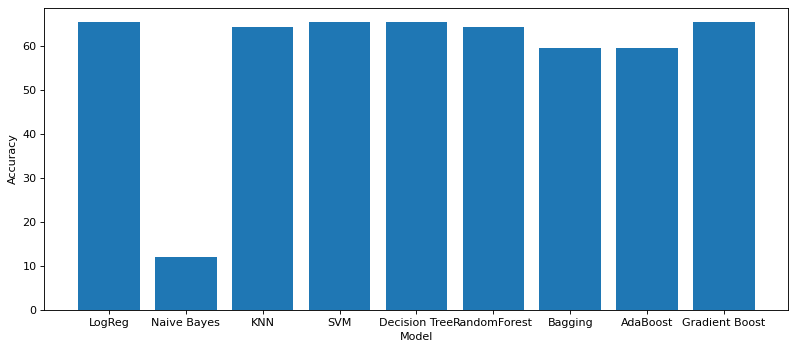

In [112]:
from matplotlib.pyplot import figure

figure(figsize=(12, 5), dpi=80)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.bar(x, y)

##plt.bar(x,y)

We can see here Decision Tree , Random Forest and SVM came up as same accuracy with ANN.